In [1]:
import sqlite3

# Create (or connect if exists) a SQLite database file
conn = sqlite3.connect("sales_data.db")
cur = conn.cursor()

# Drop the table if it already exists (so we can re-run without errors)
cur.execute("DROP TABLE IF EXISTS sales;")

# Create a new sales table
cur.execute("""
CREATE TABLE sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT NOT NULL,
    quantity INTEGER NOT NULL,
    price REAL NOT NULL,
    sale_date TEXT
);
""")

# Insert some sample sales rows
sample_data = [
    ("Widget", 5, 9.99, "2025-09-01"),
    ("Widget", 3, 9.99, "2025-09-02"),
    ("Gadget", 2, 19.99, "2025-09-01"),
    ("Gizmo", 10, 4.50, "2025-09-03"),
    ("Gadget", 1, 19.99, "2025-09-05"),
    ("Widget", 2, 9.99, "2025-09-06"),
    ("Gizmo", 4, 4.50, "2025-09-06"),
]

cur.executemany(
    "INSERT INTO sales (product, quantity, price, sale_date) VALUES (?, ?, ?, ?);",
    sample_data
)

# Save (commit) the changes
conn.commit()
conn.close()

print("✅ Database and table created, sample data inserted successfully!")


✅ Database and table created, sample data inserted successfully!


In [2]:
import sqlite3
import pandas as pd

# Connect to the database file we created earlier
conn = sqlite3.connect("sales_data.db")

# SQL query: get total quantity and total revenue per product
query = """
SELECT 
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC;
"""

# Run the query and load into pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Print the results
print("=== Basic Sales Summary ===")
print(df)

=== Basic Sales Summary ===
  product  total_qty  revenue
0  Widget         10    99.90
1   Gizmo         14    63.00
2  Gadget          3    59.97


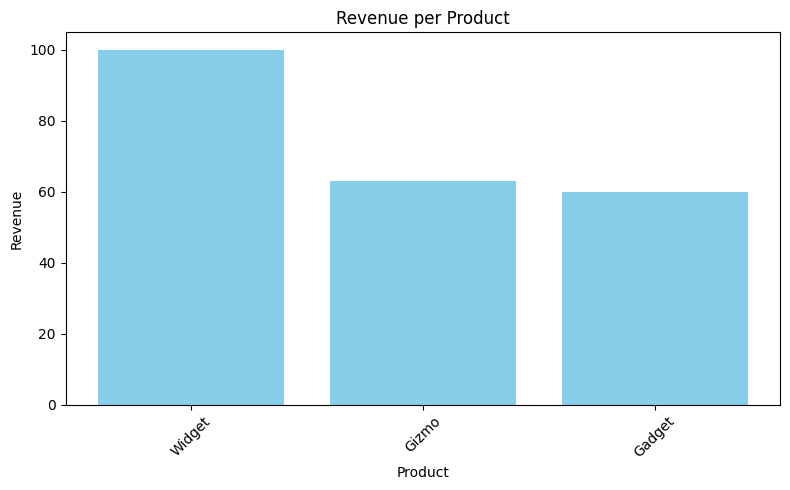

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot a bar chart: revenue per product
plt.figure(figsize=(8,5))          # optional: make the chart bigger
plt.bar(df['product'], df['revenue'], color='skyblue')
plt.title("Revenue per Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.xticks(rotation=45)           # rotate product names if needed
plt.tight_layout()                # adjust layout so labels are not cut off

# Show the plot
plt.show()

# Optional: save the chart as an image
plt.savefig("sales_chart.png")
plt.show()

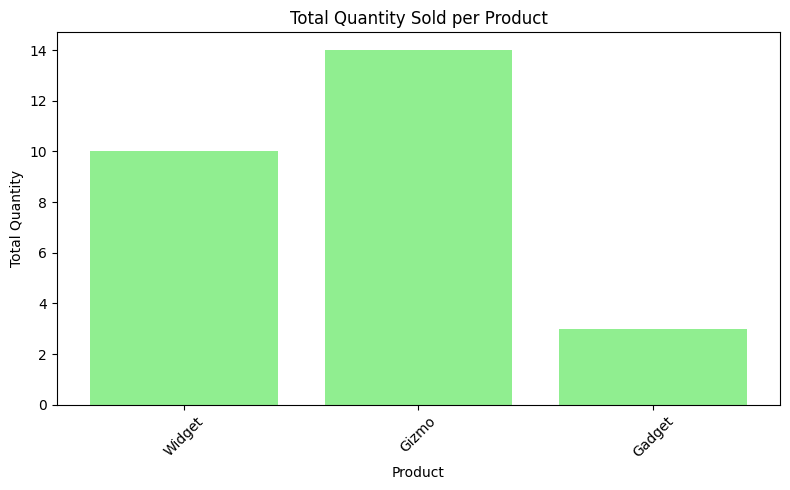

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot a bar chart: total quantity per product
plt.figure(figsize=(8,5))
plt.bar(df['product'], df['total_qty'], color='lightgreen')
plt.title("Total Quantity Sold per Product")
plt.xlabel("Product")
plt.ylabel("Total Quantity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: save this chart as an image
plt.savefig("quantity_chart.png")
plt.show()

combination of both graph for better comparision

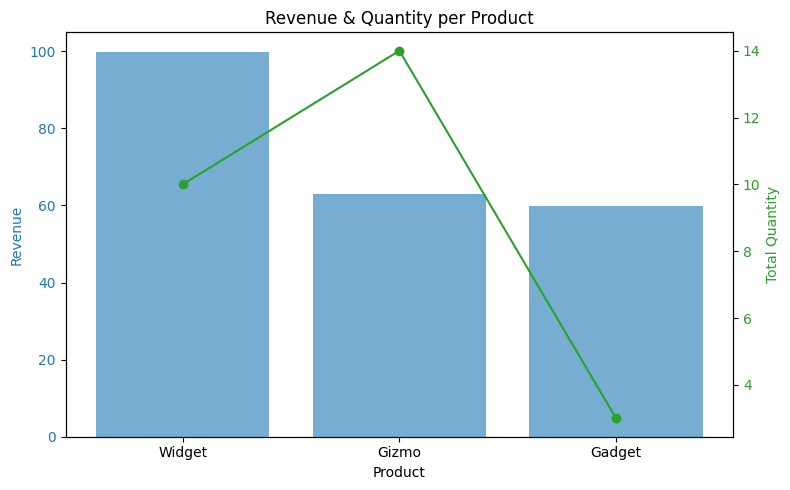

In [5]:
fig, ax1 = plt.subplots(figsize=(8,5))

color = 'tab:blue'
ax1.set_xlabel('Product')
ax1.set_ylabel('Revenue', color=color)
ax1.bar(df['product'], df['revenue'], color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # second y-axis
color = 'tab:green'
ax2.set_ylabel('Total Quantity', color=color)
ax2.plot(df['product'], df['total_qty'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Revenue & Quantity per Product")
fig.tight_layout()
plt.show()

Summary
* Created a SQLite database (sales_data.db) with a sales table (product, quantity, price).
* Queried the database using SQL inside Python with sqlite3 and pandas:
   - Calculated total quantity sold per product (SUM(quantity))
   - Calculated total revenue per product (SUM(quantity * price))
   - Printed the results using print(df)
* Plotted a bar chart for revenue using matplotlib (df['product'] vs df['revenue'])
* Plotted a bar chart for total quantity sold (df['product'] vs df['total_qty'])
* Optionally saved the charts as images (plt.savefig())